<h1><center>  projet : Analyse de données </center></h1>
<h1><center>  AIRBNB NEW YORK </center></h1>


CHRISTELLE/PATRICIA/JAMAL

Lecture des données brutes du fichier New York City Airbnb  
source kaggle "https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data"

<img src="images/NY.jpg"
style="width: 500px;"/>

<img src="images/mcd_airbnb.png"
style="width: 700px;"/>

<img src="images/sql.png"
style="width: 700px;"/>

## I- Transformation du fichier csv

### 1- Modification/optimisation des tables

recap des manip effectuées pour l'import du fichier csv dans MYsql
- réfllexion sur la base : simplification des colonnes, suppression des doublons.
- pour les quartiers création de la table de base on affecte un id à chaque quartier, secteur, et type de room.
(pour cela sur le fichier csv on effectue des recherchev ) et on importe un à un chaque fichier csv créer 
(un fichier par table)



### 2- Recupération des données

In [5]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib as mp
import seaborn as sns
import sklearn as skl
import matplotlib.pyplot as plt
import plotly.express as px

from airbnb2 import BDD #Permet de récuperer la view crée sous mysql
bdd = BDD()

In [6]:

df = pd.read_csv('airbnb2k.csv')

df.head()

,id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,availability_365,Unnamed: 7
0,2539.0,Brooklyn,Kensington,Private room,149,1.0,365.0,NaN
1,2595.0,Manhattan,Midtown,Entire home/apt,225,1.0,355.0,NaN
2,3831.0,Brooklyn,Clinton Hill,Entire home/apt,89,1.0,194.0,NaN
3,5022.0,Manhattan,East Harlem,Entire home/apt,80,10.0,0.0,NaN
4,5099.0,Manhattan,Murray Hill,Entire home/apt,200,3.0,129.0,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1910 entries, 0 to 1909
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1909 non-null   float64
 1   neighbourhood_group  1909 non-null   object 
 2   neighbourhood        1909 non-null   object 
 3   room_type            1909 non-null   object 
 4   price                1909 non-null   object 
 5   minimum_nights       1909 non-null   float64
 6   availability_365     1909 non-null   float64
 7   Unnamed: 7           1 non-null      float64
dtypes: float64(4), object(4)
memory usage: 119.5+ KB


### 3- Création des views

après l'import du fichier dans mysql nous récupérons les données via les views

on "écrit" la view sous python (celle ci nous permet de "remplacer les "données numériques" en "données alphabétiques" dans la table location)

<img src="images/view.PNG"
style="width: 1000px;"/>

puis, on copie dans mysql

<img src="images/creationviewsql.PNG"
style="width: 1000px;"/>

on retourne l'info dans le fichier en python, en appelant la fonction crée sous vs code

<img src="images/captureviewof.PNG"
style="width: 1000px;"/>

appelle de la fonction get_v_location2()

In [8]:
airbnbres = bdd.get_v_location2()
airbnbres

[('Brooklyn', 'Kensington', 'Private room', 149, 1, 365),
 ('Brooklyn', 'Bedford-Stuyvesant', 'Private room', 60, 45, 0),
 ('Brooklyn', 'South Slope', 'Private room', 89, 4, 314),
 ('Brooklyn', 'Park Slope', 'Private room', 130, 2, 347),
 ('Brooklyn', 'Park Slope', 'Private room', 80, 1, 364),
 ('Brooklyn', 'Park Slope', 'Private room', 110, 2, 304),
 ('Brooklyn', 'Windsor Terrace', 'Private room', 60, 1, 85),
 ('Brooklyn', 'Greenpoint', 'Private room', 55, 4, 284),
 ('Brooklyn', 'Bedford-Stuyvesant', 'Private room', 70, 1, 269),
 ('Brooklyn', 'South Slope', 'Private room', 89, 4, 340),
 ('Brooklyn', 'Fort Greene', 'Private room', 120, 7, 311),
 ('Brooklyn', 'Fort Greene', 'Private room', 80, 3, 192),
 ('Brooklyn', 'Bedford-Stuyvesant', 'Private room', 80, 1, 251),
 ('Brooklyn', 'Greenpoint', 'Private room', 49, 4, 320),
 ('Brooklyn', 'Williamsburg', 'Private room', 80, 2, 263),
 ('Brooklyn', 'Clinton Hill', 'Private room', 55, 7, 292),
 ('Brooklyn', 'Clinton Hill', 'Private room', 105

###  Transformation des données en tableau

In [9]:
df = pd.DataFrame(airbnbres, columns=["quartier", "secteur", "room_type", "prix","nuit_mini", "dispo"])
df.head(10)

,quartier,secteur,room_type,prix,nuit_mini,dispo
0,Brooklyn,Kensington,Private room,149,1,365
1,Brooklyn,Bedford-Stuyvesant,Private room,60,45,0
2,Brooklyn,South Slope,Private room,89,4,314
3,Brooklyn,Park Slope,Private room,130,2,347
4,Brooklyn,Park Slope,Private room,80,1,364
5,Brooklyn,Park Slope,Private room,110,2,304
6,Brooklyn,Windsor Terrace,Private room,60,1,85
7,Brooklyn,Greenpoint,Private room,55,4,284
8,Brooklyn,Bedford-Stuyvesant,Private room,70,1,269
9,Brooklyn,South Slope,Private room,89,4,340


In [10]:
df.quartier.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [11]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [12]:
df.secteur.unique()

array(['Kensington', 'Bedford-Stuyvesant', 'South Slope', 'Park Slope',
       'Windsor Terrace', 'Greenpoint', 'Fort Greene', 'Williamsburg',
       'Clinton Hill', 'Bushwick', 'Prospect-Lefferts Gardens',
       'Flatlands', 'Prospect Heights', 'DUMBO', 'Crown Heights',
       'Brooklyn Heights', 'East Flatbush', 'Brighton Beach',
       'Cobble Hill', 'Cypress Hills', 'Flatbush', 'Bay Ridge',
       'Canarsie', 'Sunset Park', 'Gowanus', 'Gravesend',
       'Carroll Gardens', 'Boerum Hill', 'East New York',
       'Sheepshead Bay', 'Fort Hamilton', 'Bensonhurst', 'Columbia St',
       'Vinegar Hill', "Hell's Kitchen", 'Upper West Side', 'Chelsea',
       'Inwood', 'Harlem', 'East Village', 'Lower East Side',
       'Washington Heights', 'Upper East Side', 'West Village',
       'East Harlem', 'Morningside Heights', 'NoHo', 'Roosevelt Island',
       'Chinatown', 'Two Bridges', 'Murray Hill', 'SoHo',
       'Theater District', 'Tribeca', 'Midtown', 'Financial District',
       'Greenw

In [13]:
df.groupby('quartier').prix.mean()


quartier
Bronx             77.058824
Brooklyn         148.219969
Manhattan        173.964573
Queens            94.333333
Staten Island     93.000000
Name: prix, dtype: float64

In [14]:
df.groupby(['quartier','secteur']).prix.mean()


quartier       secteur          
Bronx          Allerton              80.0
               Concourse            150.0
               Concourse Village     50.0
               Eastchester          105.0
               Highbridge            42.5
                                    ...  
Staten Island  Shore Acres           75.0
               St. George            70.0
               Stapleton            110.0
               Tompkinsville         36.5
               Tottenville          299.0
Name: prix, Length: 106, dtype: float64

Text(0.5, 1.0, 'Le prix des locations dans les différents quartiers')

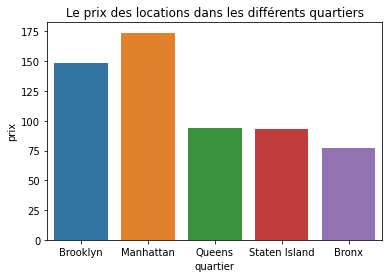

In [15]:
sns.barplot(x='quartier',y='prix',data=df,ci=None)
plt.title('Le prix des locations dans les différents quartiers')

Le prix des locations est le plus élevé à Manhattan

In [16]:
df.describe()

,prix,nuit_mini,dispo
count,1365.000000,1365.000000,1365.000000
mean,155.637363,9.386813,161.087912
std,119.257329,24.634867,133.641342
min,20.000000,1.000000,0.000000
25%,86.000000,2.000000,12.000000
50%,125.000000,3.000000,172.000000
75%,195.000000,6.000000,287.000000
max,2000.000000,370.000000,365.000000


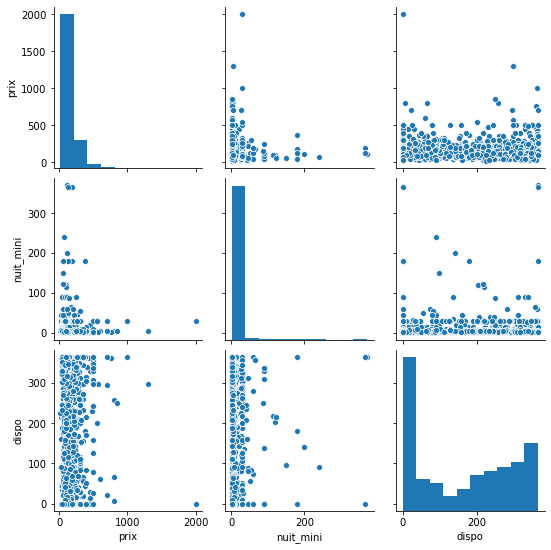

In [17]:
sns.pairplot(df)

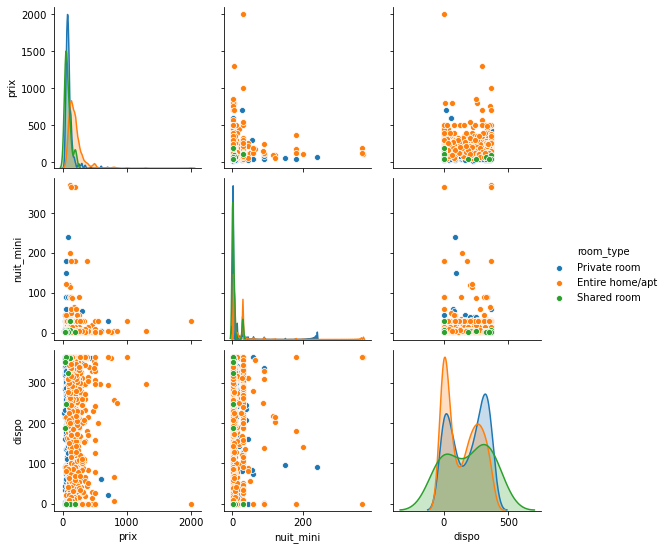

In [18]:
sns.pairplot(df, hue ='room_type')

### 4 - CREATION DES PROCEDURES

https://openclassrooms.com/fr/courses/1959476-administrez-vos-bases-de-donnees-avec-mysql/1971667-procedures-stockees

<img src="images/listedesproceduresof.PNG"
style="width: 1000px;"/>

In [30]:
#prix<50
df2 = bdd.appeler_procedure_prix_quartiers(50)
df2

[(1, 49, 'Brooklyn'),
 (1, 44, 'Brooklyn'),
 (1, 39, 'Brooklyn'),
 (1, 49, 'Brooklyn'),
 (1, 39, 'Brooklyn'),
 (1, 46, 'Brooklyn'),
 (1, 43, 'Brooklyn'),
 (1, 42, 'Brooklyn'),
 (1, 41, 'Brooklyn'),
 (1, 40, 'Brooklyn'),
 (1, 48, 'Brooklyn'),
 (1, 48, 'Brooklyn'),
 (1, 45, 'Brooklyn'),
 (1, 34, 'Brooklyn'),
 (1, 47, 'Brooklyn'),
 (1, 44, 'Brooklyn'),
 (1, 30, 'Brooklyn'),
 (1, 35, 'Brooklyn'),
 (1, 49, 'Brooklyn'),
 (1, 45, 'Brooklyn'),
 (1, 39, 'Brooklyn'),
 (1, 46, 'Brooklyn'),
 (1, 49, 'Brooklyn'),
 (1, 36, 'Brooklyn'),
 (1, 48, 'Brooklyn'),
 (1, 35, 'Brooklyn'),
 (2, 44, 'Manhattan'),
 (2, 40, 'Manhattan'),
 (2, 49, 'Manhattan'),
 (3, 42, 'Queens'),
 (3, 42, 'Queens'),
 (3, 33, 'Queens'),
 (3, 30, 'Queens'),
 (3, 45, 'Queens'),
 (3, 39, 'Queens'),
 (4, 36, 'Staten Island'),
 (4, 37, 'Staten Island'),
 (4, 37, 'Staten Island'),
 (4, 36, 'Staten Island'),
 (4, 20, 'Staten Island'),
 (5, 40, 'Bronx'),
 (5, 45, 'Bronx'),
 (5, 37, 'Bronx'),
 (5, 42, 'Bronx'),
 (5, 49, 'Bronx'),
 (5, 35, 

In [31]:
df3 = pd.DataFrame(df2, columns=["id_quartier", "prix", "nom_quartier"])
df3.head()


,id_quartier,prix,nom_quartier
0,1,49,Brooklyn
1,1,44,Brooklyn
2,1,39,Brooklyn
3,1,49,Brooklyn
4,1,39,Brooklyn


In [32]:
df3.groupby('nom_quartier').count()

,id_quartier,prix
nom_quartier,,
Bronx,7,7
Brooklyn,26,26
Manhattan,3,3
Queens,6,6
Staten Island,5,5


In [34]:
#prix>500
df4 = bdd.appeler_procedure_prix_quartiersup(500)
df4

[(1, 800, 'Brooklyn'),
 (1, 599, 'Brooklyn'),
 (1, 599, 'Brooklyn'),
 (1, 800, 'Brooklyn'),
 (1, 800, 'Brooklyn'),
 (2, 575, 'Manhattan'),
 (2, 2000, 'Manhattan'),
 (2, 700, 'Manhattan'),
 (2, 850, 'Manhattan'),
 (2, 760, 'Manhattan'),
 (2, 1300, 'Manhattan'),
 (2, 549, 'Manhattan'),
 (2, 700, 'Manhattan'),
 (2, 1000, 'Manhattan'),
 (2, 700, 'Manhattan')]

In [35]:
df5 = pd.DataFrame(df4, columns=["id_quartier", "prix", "nom_quartier"])
df5.head()

,id_quartier,prix,nom_quartier
0,1,800,Brooklyn
1,1,599,Brooklyn
2,1,599,Brooklyn
3,1,800,Brooklyn
4,1,800,Brooklyn


In [36]:
df5.groupby('nom_quartier').count()

,id_quartier,prix
nom_quartier,,
Brooklyn,5,5
Manhattan,10,10


Les propositions de logement dont les tarifs sont les plus élevées se trouvent à Manhattan, et Brooklyn propose les tarifs les moins élevés.

In [39]:
df6 = bdd.appeler_procedure_dispo_prix_quartier(0)
df6

[(149, 1, 'Brooklyn'),
 (89, 1, 'Brooklyn'),
 (60, 45, 'Brooklyn'),
 (89, 4, 'Brooklyn'),
 (140, 2, 'Brooklyn'),
 (215, 2, 'Brooklyn'),
 (99, 3, 'Brooklyn'),
 (299, 3, 'Brooklyn'),
 (130, 2, 'Brooklyn'),
 (80, 1, 'Brooklyn'),
 (110, 2, 'Brooklyn'),
 (120, 2, 'Brooklyn'),
 (60, 1, 'Brooklyn'),
 (55, 4, 'Brooklyn'),
 (70, 1, 'Brooklyn'),
 (89, 4, 'Brooklyn'),
 (85, 2, 'Brooklyn'),
 (120, 3, 'Brooklyn'),
 (120, 7, 'Brooklyn'),
 (150, 29, 'Brooklyn'),
 (110, 7, 'Brooklyn'),
 (115, 3, 'Brooklyn'),
 (80, 3, 'Brooklyn'),
 (80, 1, 'Brooklyn'),
 (228, 3, 'Brooklyn'),
 (144, 2, 'Brooklyn'),
 (150, 30, 'Brooklyn'),
 (49, 4, 'Brooklyn'),
 (80, 2, 'Brooklyn'),
 (200, 30, 'Brooklyn'),
 (55, 7, 'Brooklyn'),
 (225, 3, 'Brooklyn'),
 (275, 1, 'Brooklyn'),
 (105, 2, 'Brooklyn'),
 (95, 3, 'Brooklyn'),
 (145, 3, 'Brooklyn'),
 (130, 6, 'Brooklyn'),
 (800, 1, 'Brooklyn'),
 (105, 3, 'Brooklyn'),
 (85, 3, 'Brooklyn'),
 (65, 4, 'Brooklyn'),
 (131, 4, 'Brooklyn'),
 (98, 7, 'Brooklyn'),
 (250, 7, 'Brooklyn'),
 (1